In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pew = pd.read_csv("pew.csv")
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [4]:
pew_tidy = pew.melt(id_vars = ["religion"], var_name = "salary", value_name = "count")
pew_tidy

,religion,salary,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [5]:
pew_tidy.dtypes

religion    object
salary      object
count        int64
dtype: object

In [6]:
pew_tidy.religion = pew_tidy.religion.astype("category")
pew_tidy.salary = pew_tidy.salary.astype("category")
pew_tidy.dtypes

religion    category
salary      category
count          int64
dtype: object

In [7]:
tb = pd.read_csv("tb.csv")
tb

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [8]:
tb.dtypes

iso2      object
year       int64
m04      float64
m514     float64
m014     float64
m1524    float64
m2534    float64
m3544    float64
m4554    float64
m5564    float64
m65      float64
mu       float64
f04      float64
f514     float64
f014     float64
f1524    float64
f2534    float64
f3544    float64
f4554    float64
f5564    float64
f65      float64
fu       float64
dtype: object

In [9]:
tb.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5769.0,1994.229329,8.423265,1980.0,1987.0,1994.0,2002.00,2008.0
m04,392.0,8.806122,46.094789,0.0,0.0,0.0,2.00,655.0
m514,401.0,28.975062,127.881505,0.0,0.0,1.0,8.00,1519.0
m014,2381.0,79.438051,280.489536,0.0,0.0,6.0,36.00,4648.0
m1524,2407.0,922.364769,4278.638975,0.0,10.0,92.0,511.50,77121.0
m2534,2408.0,1301.894518,5253.398971,0.0,15.0,151.5,728.00,83850.0
m3544,2415.0,1205.566046,5409.064589,0.0,16.0,134.0,591.50,90498.0
m4554,2421.0,983.515489,4780.782748,0.0,13.0,98.0,434.00,78815.0
m5564,2414.0,696.171914,3771.934518,0.0,9.0,62.0,273.75,57492.0
m65,2408.0,609.440615,3660.224592,0.0,8.0,53.0,227.25,70376.0


In [10]:
tb_refreshed  = tb.melt(id_vars = ["iso2", "year"], var_name = "sex_and_age", value_name = "case")
tb_refreshed

,iso2,year,sex_and_age,case
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN
...,...,...,...,...
115375,ZW,2004,fu,NaN
115376,ZW,2005,fu,NaN
115377,ZW,2006,fu,NaN
115378,ZW,2007,fu,NaN


In [11]:
tb_refreshed.head()

,iso2,year,sex_and_age,case
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN


In [12]:
tb_refreshed.sex_and_age.str.slice(0,1)

0         m
1         m
2         m
3         m
4         m
         ..
115375    f
115376    f
115377    f
115378    f
115379    f
Name: sex_and_age, Length: 115380, dtype: object

In [13]:
tb_refreshed.sex_and_age.str.slice(0,1).unique()

array(['m', 'f'], dtype=object)

In [14]:
tb_refreshed.sex_and_age.str.slice(1).unique()

array(['04', '514', '014', '1524', '2534', '3544', '4554', '5564', '65',
       'u'], dtype=object)

In [15]:
tb_refreshed["gender"] = tb_refreshed.sex_and_age.str.slice(0,1)
tb_refreshed["age_group"] = tb_refreshed.sex_and_age.str.slice(1)
tb_refreshed

,iso2,year,sex_and_age,case,gender,age_group
0,AD,1989,m04,NaN,m,04
1,AD,1990,m04,NaN,m,04
2,AD,1991,m04,NaN,m,04
3,AD,1992,m04,NaN,m,04
4,AD,1993,m04,NaN,m,04
...,...,...,...,...,...,...
115375,ZW,2004,fu,NaN,f,u
115376,ZW,2005,fu,NaN,f,u
115377,ZW,2006,fu,NaN,f,u
115378,ZW,2007,fu,NaN,f,u


In [16]:
tb_refreshed  = tb_refreshed.drop(columns = ["sex_and_age"])
tb_refreshed

,iso2,year,case,gender,age_group
0,AD,1989,NaN,m,04
1,AD,1990,NaN,m,04
2,AD,1991,NaN,m,04
3,AD,1992,NaN,m,04
4,AD,1993,NaN,m,04
...,...,...,...,...,...
115375,ZW,2004,NaN,f,u
115376,ZW,2005,NaN,f,u
115377,ZW,2006,NaN,f,u
115378,ZW,2007,NaN,f,u


In [17]:
tb_refreshed.describe().T

,count,mean,std,min,25%,50%,75%,max
year,115380.0,1994.229329,8.422571,1980.0,1987.0,1994.0,2002.0,2008.0
case,35750.0,609.378881,3278.187960,0.0,4.0,36.0,245.0,90498.0


In [18]:
tb_noNan = tb_refreshed.dropna()

In [19]:
tb_noNan

,iso2,year,case,gender,age_group
15,AD,2005,0.0,m,04
16,AD,2006,0.0,m,04
18,AD,2008,0.0,m,04
42,AE,2006,0.0,m,04
43,AE,2007,0.0,m,04
...,...,...,...,...,...
115195,VU,2008,0.0,f,u
115269,YE,2008,0.0,f,u
115323,ZA,2008,0.0,f,u
115350,ZM,2008,0.0,f,u


In [20]:
tb_noNan.case.mean()

611.1249437443745

In [21]:
tb_noNan[tb_noNan.iso2 == "BG"].case.mean()

58.46478873239437

In [22]:
tb_noNan.age_group

15        04
16        04
18        04
42        04
43        04
          ..
115195     u
115269     u
115323     u
115350     u
115379     u
Name: age_group, Length: 35552, dtype: object

In [23]:
tb_noNan.age_group.str.len().value_counts() #дължината на всеки стринг

age_group
4    23912
2     5561
3     5536
1      543
Name: count, dtype: int64

In [24]:
def proces_age(age_group):
    ages = {"04":"0-4", "65": "65+", "u": "unknown"}
    if age_group in ages:
        return ages[age_group]
    else:
        return f"{age_group[:2]} - {age_group[-2:]}"
        

In [25]:
tb_noNan.age_group = tb_noNan.age_group.apply(proces_age)

/var/folders/nz/lkk4btz5339fx9fmmkl0b8zr0000gp/T/ipykernel_1836/3743460874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_noNan.age_group = tb_noNan.age_group.apply(proces_age)


In [26]:
tb_noNan

,iso2,year,case,gender,age_group
15,AD,2005,0.0,m,0-4
16,AD,2006,0.0,m,0-4
18,AD,2008,0.0,m,0-4
42,AE,2006,0.0,m,0-4
43,AE,2007,0.0,m,0-4
...,...,...,...,...,...
115195,VU,2008,0.0,f,unknown
115269,YE,2008,0.0,f,unknown
115323,ZA,2008,0.0,f,unknown
115350,ZM,2008,0.0,f,unknown


In [27]:
tb_noNan.gender = tb_noNan.gender.astype("category")
tb_noNan.age_group = tb_noNan.age_group.astype("category")

/var/folders/nz/lkk4btz5339fx9fmmkl0b8zr0000gp/T/ipykernel_1836/2769505020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_noNan.gender = tb_noNan.gender.astype("category")
/var/folders/nz/lkk4btz5339fx9fmmkl0b8zr0000gp/T/ipykernel_1836/2769505020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_noNan.age_group = tb_noNan.age_group.astype("category")


In [28]:
tb_noNan.dtypes

iso2           object
year            int64
case          float64
gender       category
age_group    category
dtype: object

In [29]:
tb_noNan = tb_noNan[["iso2","year","gender","age_group","case"]] #пренареждаме колоните

In [30]:
tb_noNan = tb_noNan.sort_values(["iso2","year"])
tb_noNan

,iso2,year,gender,age_group,case
11544,AD,1996,m,01 - 14,0.0
17313,AD,1996,m,15 - 24,0.0
23082,AD,1996,m,25 - 34,0.0
28851,AD,1996,m,35 - 44,4.0
34620,AD,1996,m,45 - 54,1.0
...,...,...,...,...,...
92303,ZW,2008,f,35 - 44,2890.0
98072,ZW,2008,f,45 - 54,467.0
103841,ZW,2008,f,55 - 64,174.0
109610,ZW,2008,f,65+,105.0


In [31]:
tb_noNan = tb_noNan.reset_index(drop = True) #оправяме индексите
tb_noNan

,iso2,year,gender,age_group,case
0,AD,1996,m,01 - 14,0.0
1,AD,1996,m,15 - 24,0.0
2,AD,1996,m,25 - 34,0.0
3,AD,1996,m,35 - 44,4.0
4,AD,1996,m,45 - 54,1.0
...,...,...,...,...,...
35547,ZW,2008,f,35 - 44,2890.0
35548,ZW,2008,f,45 - 54,467.0
35549,ZW,2008,f,55 - 64,174.0
35550,ZW,2008,f,65+,105.0


In [32]:
tb_noNan.case.astype(int)

0           0
1           0
2           0
3           4
4           1
         ... 
35547    2890
35548     467
35549     174
35550     105
35551       0
Name: case, Length: 35552, dtype: int64

In [33]:
tb_noNan

,iso2,year,gender,age_group,case
0,AD,1996,m,01 - 14,0.0
1,AD,1996,m,15 - 24,0.0
2,AD,1996,m,25 - 34,0.0
3,AD,1996,m,35 - 44,4.0
4,AD,1996,m,45 - 54,1.0
...,...,...,...,...,...
35547,ZW,2008,f,35 - 44,2890.0
35548,ZW,2008,f,45 - 54,467.0
35549,ZW,2008,f,55 - 64,174.0
35550,ZW,2008,f,65+,105.0


In [34]:
weather = pd.read_csv("weather.csv")
weather

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [35]:
weather_tidy = weather.melt(id_vars = ["id", "year","month", "element"], var_name = "day", value_name = "temperature")
weather_tidy.dtypes

id              object
year             int64
month            int64
element         object
day             object
temperature    float64
dtype: object

In [36]:
weather_tidy.day = weather_tidy.day.str.slice(1).astype(str)
weather_tidy

,id,year,month,element,day,temperature
0,MX17004,2010,1,tmax,1,NaN
1,MX17004,2010,1,tmin,1,NaN
2,MX17004,2010,2,tmax,1,NaN
3,MX17004,2010,2,tmin,1,NaN
4,MX17004,2010,3,tmax,1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,31,NaN
678,MX17004,2010,11,tmax,31,NaN
679,MX17004,2010,11,tmin,31,NaN
680,MX17004,2010,12,tmax,31,NaN


In [37]:
weather_tidy = weather_tidy.dropna()
weather_tidy

,id,year,month,element,day,temperature
20,MX17004,2010,12,tmax,1,29.9
21,MX17004,2010,12,tmin,1,13.8
24,MX17004,2010,2,tmax,2,27.3
25,MX17004,2010,2,tmin,2,14.4
40,MX17004,2010,11,tmax,2,31.3
...,...,...,...,...,...,...
631,MX17004,2010,8,tmin,29,15.3
638,MX17004,2010,1,tmax,30,27.8
639,MX17004,2010,1,tmin,30,14.5
674,MX17004,2010,8,tmax,31,25.4


In [38]:
weather_tidy.year = weather_tidy.year.astype(str)
weather_tidy.month = weather_tidy.month.astype(str)

/var/folders/nz/lkk4btz5339fx9fmmkl0b8zr0000gp/T/ipykernel_1836/2047539657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_tidy.year = weather_tidy.year.astype(str)
/var/folders/nz/lkk4btz5339fx9fmmkl0b8zr0000gp/T/ipykernel_1836/2047539657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_tidy.month = weather_tidy.month.astype(str)


In [39]:
weather_tidy = weather_tidy.reset_index(drop = True)
weather_tidy

,id,year,month,element,day,temperature
0,MX17004,2010,12,tmax,1,29.9
1,MX17004,2010,12,tmin,1,13.8
2,MX17004,2010,2,tmax,2,27.3
3,MX17004,2010,2,tmin,2,14.4
4,MX17004,2010,11,tmax,2,31.3
...,...,...,...,...,...,...
61,MX17004,2010,8,tmin,29,15.3
62,MX17004,2010,1,tmax,30,27.8
63,MX17004,2010,1,tmin,30,14.5
64,MX17004,2010,8,tmax,31,25.4


In [40]:
weather_tidy.dtypes

id              object
year            object
month           object
element         object
day             object
temperature    float64
dtype: object

In [41]:
date = weather_tidy.year +"-" + weather_tidy.month + "-" + weather_tidy.day
date

0     2010-12-1
1     2010-12-1
2      2010-2-2
3      2010-2-2
4     2010-11-2
        ...    
61    2010-8-29
62    2010-1-30
63    2010-1-30
64    2010-8-31
65    2010-8-31
Length: 66, dtype: object

In [42]:
date = pd.to_datetime(date)
date

0    2010-12-01
1    2010-12-01
2    2010-02-02
3    2010-02-02
4    2010-11-02
        ...    
61   2010-08-29
62   2010-01-30
63   2010-01-30
64   2010-08-31
65   2010-08-31
Length: 66, dtype: datetime64[ns]

In [43]:
weather_tidy["date"] = date
weather_tidy

,id,year,month,element,day,temperature,date
0,MX17004,2010,12,tmax,1,29.9,2010-12-01
1,MX17004,2010,12,tmin,1,13.8,2010-12-01
2,MX17004,2010,2,tmax,2,27.3,2010-02-02
3,MX17004,2010,2,tmin,2,14.4,2010-02-02
4,MX17004,2010,11,tmax,2,31.3,2010-11-02
...,...,...,...,...,...,...,...
61,MX17004,2010,8,tmin,29,15.3,2010-08-29
62,MX17004,2010,1,tmax,30,27.8,2010-01-30
63,MX17004,2010,1,tmin,30,14.5,2010-01-30
64,MX17004,2010,8,tmax,31,25.4,2010-08-31


In [44]:
weather_tidy_full_date = weather_tidy.drop(columns = ["year", "month", "day"])

In [45]:
weather_tidy_full_date = weather_tidy_full_date[["id", "date", "element", "temperature"]]
weather_tidy_full_date

,id,date,element,temperature
0,MX17004,2010-12-01,tmax,29.9
1,MX17004,2010-12-01,tmin,13.8
2,MX17004,2010-02-02,tmax,27.3
3,MX17004,2010-02-02,tmin,14.4
4,MX17004,2010-11-02,tmax,31.3
...,...,...,...,...
61,MX17004,2010-08-29,tmin,15.3
62,MX17004,2010-01-30,tmax,27.8
63,MX17004,2010-01-30,tmin,14.5
64,MX17004,2010-08-31,tmax,25.4


In [46]:
weather_tidy_full_date = weather_tidy_full_date.pivot_table(index = ["id", "date"], columns = "element", values = "temperature")
weather_tidy_full_date.reset_index(drop = True)

element,tmax,tmin
0,27.8,14.5
1,27.3,14.4
2,24.1,14.4
3,29.7,13.4
4,29.9,10.7
5,32.1,14.2
6,34.5,16.8
7,31.1,17.6
8,36.3,16.7
9,33.2,18.2


In [ ]:
#pd.to_datetime(weather_tidy["year"], format = "%Y").dt.strftime("%Y")

In [ ]:
#pd.to_datetime(weather_tidy["day"], format = "%d").dt.strftime("%d")

In [ ]:
#pd.to_datetime(weather_tidy["month"], format = "%m").dt.strftime("%m")

In [ ]:
#pd.to_datetime(weather_tidy["month"], format ='%m').dt.month

In [ ]:
#weather_tidy["month"].values.astype('datetime64[M]')

In [48]:
billboard = pd.read_csv("billboard.csv")
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
billboard = billboard.melt(id_vars = ["year", "artist", "track", "time", "date.entered"], var_name = "week", value_name = "position")

In [50]:
billboard

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [51]:
billboard_tidy = billboard.dropna()

In [52]:
billboard_tidy.week = billboard_tidy.week.str.slice(2).astype(int)

/var/folders/nz/lkk4btz5339fx9fmmkl0b8zr0000gp/T/ipykernel_1836/2152225162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_tidy.week = billboard_tidy.week.str.slice(2).astype(int)


In [53]:
billboard_tidy.position = billboard_tidy.position.astype(int)

/var/folders/nz/lkk4btz5339fx9fmmkl0b8zr0000gp/T/ipykernel_1836/4235207568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_tidy.position = billboard_tidy.position.astype(int)


In [55]:
billboard_tidy["date.entered"] = pd.to_datetime(billboard_tidy["date.entered"])

/var/folders/nz/lkk4btz5339fx9fmmkl0b8zr0000gp/T/ipykernel_1836/1623008242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_tidy["date.entered"] = pd.to_datetime(billboard_tidy["date.entered"])


In [57]:
billboard_tidy.dtypes

year                     int64
artist                  object
track                   object
time                    object
date.entered    datetime64[ns]
week                     int64
position                 int64
dtype: object

In [59]:
week_in_date = billboard_tidy.week.apply(lambda x: pd.Timedelta(x-1, "w"))
week_in_date                                        

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
          ...   
19716   434 days
19833   434 days
20033   441 days
20150   441 days
20350   448 days
Name: week, Length: 5307, dtype: timedelta64[ns]

In [61]:
billboard_tidy["date"] = billboard_tidy["date.entered"] + week_in_date

/var/folders/nz/lkk4btz5339fx9fmmkl0b8zr0000gp/T/ipykernel_1836/1615644387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_tidy["date"] = billboard_tidy["date.entered"] + week_in_date


In [62]:
billboard_tidy

,year,artist,track,time,date.entered,week,position,date
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57,2000-04-15
...,...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50,2000-11-18
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45,2000-08-12
20033,2000,Creed,Higher,5:16,1999-09-11,64,50,2000-11-25
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50,2000-08-19


In [68]:
billboard_tidy

,year,artist,track,time,date.entered,position,date
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,2000-04-15
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,50,2000-11-18
19833,2000,Lonestar,Amazed,4:25,1999-06-05,45,2000-08-12
20033,2000,Creed,Higher,5:16,1999-09-11,50,2000-11-25
20150,2000,Lonestar,Amazed,4:25,1999-06-05,50,2000-08-19


In [70]:
billboard_tidy.track[1]

'The Hardest Part Of ...'

In [71]:
billboard_tidy.groupby("track").artist.value_counts()

track                    artist          
(Hot S**t) Country G...  Nelly               34
3 Little Words           Nu Flavor            9
911                      Jean, Wyclef        19
A Country Boy Can Su...  Brock, Chad          3
A Little Gasoline        Clark, Terri         6
                                             ..
You Won't Be Lonely ...  Cyrus, Billy Ray    13
You'll Always Be Lov...  Brooks & Dunn       19
You're A God             Vertical Horizon    21
Your Everything          Urban, Keith        16
www.memory               Jackson, Alan       15
Name: count, Length: 317, dtype: int64

In [72]:
billboard_tidy.groupby(["artist","track"]).value_counts()

artist           track                    year  time  date.entered  position  date      
2 Pac            Baby Don't Cry (Keep...  2000  4:22  2000-02-26    72        2000-03-11    1
                                                                    77        2000-03-18    1
                                                                    99        2000-04-08    1
                                                                    94        2000-04-01    1
                                                                    87        2000-03-25    1
                                                                                           ..
matchbox twenty  Bent                     2000  4:12  2000-04-29    22        2000-05-27    1
                                                                    21        2000-06-03    1
                                                                    20        2000-11-11    1
                                                                 

In [80]:
billboard_tidy = billboard_tidy.reset_index(drop = True)
billboard_tidy

,year,artist,track,time,date.entered,position,date
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,2000-04-15
...,...,...,...,...,...,...,...
5302,2000,Creed,Higher,5:16,1999-09-11,50,2000-11-18
5303,2000,Lonestar,Amazed,4:25,1999-06-05,45,2000-08-12
5304,2000,Creed,Higher,5:16,1999-09-11,50,2000-11-25
5305,2000,Lonestar,Amazed,4:25,1999-06-05,50,2000-08-19


In [81]:
billboard_tidy[billboard_tidy.position == 1].artist.value_counts()

artist
Destiny's Child        14
Santana                10
Aguilera, Christina     6
Madonna                 4
Savage Garden           4
Janet                   3
Iglesias, Enrique       3
Sisqo                   2
N'Sync                  2
Lonestar                2
Carey, Mariah           1
matchbox twenty         1
Aaliyah                 1
Vertical Horizon        1
Creed                   1
Name: count, dtype: int64

In [153]:
weather_data = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [154]:
weather_data

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [155]:
weather_data.columns, weather_data.dtypes

(Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
        'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
        ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
        ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
        ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
        ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
        'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
       dtype='object'),
 EDT                            object
 Max TemperatureF                int64
 Mean TemperatureF               int64
 Min TemperatureF                int64
 Max Dew PointF                  int64
 MeanDew PointF                  int64
 Min DewpointF                   int64
 Max Humidity                    int64
  Mean Humidity                  int64
  Min Humidity                   int64
  Max Sea Level PressureIn     float64
  Mean Sea Level PressureI

In [156]:
weather_data.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew", "mean_dew", "min_dew", "max_humidity", "mean_humidity", 
                        "min_humidity", "max_pressure", "mean_pressure","min_pressure", "max_visibility", "mean_visibility","min_visibility", 
                        "max_wind", "mean_wind", "max_gusts","precipitation", "cloud_cover", "events", "wind_dir"]

In [157]:
weather_data

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [158]:
weather_data["date"] = pd.to_datetime(weather_data["date"])

In [159]:
weather_data.dtypes


date               datetime64[ns]
max_temp                    int64
mean_temp                   int64
min_temp                    int64
max_dew                     int64
mean_dew                    int64
min_dew                     int64
max_humidity                int64
mean_humidity               int64
min_humidity                int64
max_pressure              float64
mean_pressure             float64
min_pressure              float64
max_visibility              int64
mean_visibility             int64
min_visibility              int64
max_wind                    int64
mean_wind                   int64
max_gusts                 float64
precipitation              object
cloud_cover                 int64
events                     object
wind_dir                    int64
dtype: object

In [160]:
weather_data.precipitation

0      0.00
1         T
2      0.03
3      0.00
4      0.00
       ... 
361    0.04
362    0.00
363    0.00
364       T
365    0.00
Name: precipitation, Length: 366, dtype: object

In [161]:
weather_data.loc[weather_data.precipitation == "T", "precipitation"] = 1e-6

In [162]:
weather_data.dtypes

date               datetime64[ns]
max_temp                    int64
mean_temp                   int64
min_temp                    int64
max_dew                     int64
mean_dew                    int64
min_dew                     int64
max_humidity                int64
mean_humidity               int64
min_humidity                int64
max_pressure              float64
mean_pressure             float64
min_pressure              float64
max_visibility              int64
mean_visibility             int64
min_visibility              int64
max_wind                    int64
mean_wind                   int64
max_gusts                 float64
precipitation              object
cloud_cover                 int64
events                     object
wind_dir                    int64
dtype: object

In [163]:
weather_data.precipitation = weather_data.precipitation.astype(float)
weather_data.dtypes

date               datetime64[ns]
max_temp                    int64
mean_temp                   int64
min_temp                    int64
max_dew                     int64
mean_dew                    int64
min_dew                     int64
max_humidity                int64
mean_humidity               int64
min_humidity                int64
max_pressure              float64
mean_pressure             float64
min_pressure              float64
max_visibility              int64
mean_visibility             int64
min_visibility              int64
max_wind                    int64
mean_wind                   int64
max_gusts                 float64
precipitation             float64
cloud_cover                 int64
events                     object
wind_dir                    int64
dtype: object

In [164]:
weather_data.events.value_counts(dropna = False)

events
NaN                           204
Rain                           69
Rain-Thunderstorm              26
Fog                            13
Snow                           13
Fog-Rain                       11
Thunderstorm                    9
Fog-Rain-Thunderstorm           8
Fog-Snow                        5
Fog-Rain-Snow                   3
Rain-Snow                       3
Fog-Thunderstorm                1
Fog-Rain-Snow-Thunderstorm      1
Name: count, dtype: int64

In [165]:
weather_data = weather_data.set_index("date")

In [166]:
weather_data.resample("w").min_temp.mean()

date
2012-03-11    27.000000
2012-03-18    51.714286
2012-03-25    54.857143
2012-04-01    46.714286
2012-04-08    45.571429
2012-04-15    39.714286
2012-04-22    41.142857
2012-04-29    41.428571
2012-05-06    62.285714
2012-05-13    50.857143
2012-05-20    52.857143
2012-05-27    58.714286
2012-06-03    54.142857
2012-06-10    51.142857
2012-06-17    59.000000
2012-06-24    62.428571
2012-07-01    64.857143
2012-07-08    69.285714
2012-07-15    65.428571
2012-07-22    68.000000
2012-07-29    69.000000
2012-08-05    64.142857
2012-08-12    58.285714
2012-08-19    55.142857
2012-08-26    54.857143
2012-09-02    64.857143
2012-09-09    62.571429
2012-09-16    51.000000
2012-09-23    43.857143
2012-09-30    50.857143
2012-10-07    45.571429
2012-10-14    37.142857
2012-10-21    42.857143
2012-10-28    48.571429
2012-11-04    32.714286
2012-11-11    33.714286
2012-11-18    24.285714
2012-11-25    29.857143
2012-12-02    32.428571
2012-12-09    42.142857
2012-12-16    27.000000
2012-12-23 

In [167]:
weather_data.resample(pd.Timedelta(3,"days")).max_temp.mean()

date
2012-03-10    64.666667
2012-03-13    78.333333
2012-03-16    77.666667
2012-03-19    84.000000
2012-03-22    73.000000
                ...    
2013-02-24    45.333333
2013-02-27    37.666667
2013-03-02    36.333333
2013-03-05    36.000000
2013-03-08    54.333333
Freq: 3D, Name: max_temp, Length: 122, dtype: float64

In [169]:
weather_data.resample("12d").max_temp.mean()

date
2012-03-10    76.166667
2012-03-22    71.750000
2012-04-03    64.583333
2012-04-15    68.416667
2012-04-27    78.000000
2012-05-09    77.500000
2012-05-21    81.666667
2012-06-02    80.333333
2012-06-14    90.083333
2012-06-26    99.000000
2012-07-08    93.416667
2012-07-20    93.000000
2012-08-01    90.166667
2012-08-13    83.416667
2012-08-25    85.916667
2012-09-06    78.000000
2012-09-18    69.250000
2012-09-30    61.833333
2012-10-12    66.833333
2012-10-24    55.500000
2012-11-05    53.583333
2012-11-17    52.500000
2012-11-29    57.333333
2012-12-11    46.500000
2012-12-23    34.166667
2013-01-04    44.750000
2013-01-16    35.250000
2013-01-28    43.333333
2013-02-09    43.833333
2013-02-21    38.833333
2013-03-05    45.166667
Freq: 12D, Name: max_temp, dtype: float64

In [170]:
weather_data.rolling("12d").max_temp.mean()

date
2012-03-10    56.000000
2012-03-11    61.500000
2012-03-12    64.666667
2012-03-13    67.500000
2012-03-14    70.000000
                ...    
2013-03-06    39.000000
2013-03-07    38.833333
2013-03-08    39.000000
2013-03-09    39.750000
2013-03-10    41.083333
Name: max_temp, Length: 366, dtype: float64

In [171]:
weather_data.events = weather_data.events.astype(str)
weather_data_with_events = weather_data[weather_data.events != "nan"]
weather_data_with_events.head()

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-03-11,67,49,30,43,31,24,78,53,28,30.37,...,10,10,10,22,7,32.0,0.000001,1,Rain,163
2012-03-12,71,62,53,59,55,43,90,76,61,30.13,...,10,10,6,24,14,36.0,0.030000,6,Rain,190
2012-03-15,79,69,58,61,58,53,90,69,48,30.13,...,10,10,10,31,10,41.0,0.040000,3,Rain-Thunderstorm,209
2012-03-17,78,62,46,60,54,46,100,78,56,30.15,...,10,5,0,12,5,17.0,0.000001,3,Fog-Thunderstorm,162
2012-03-18,80,70,59,61,58,57,93,69,45,30.14,...,10,10,9,18,8,25.0,0.000001,2,Rain,197


In [172]:
weather_data_with_events[["max_temp", "mean_temp", "min_temp"]].apply(lambda x: (x - 32) * (5/9), axis = 1)

,max_temp,mean_temp,min_temp
date,,,
2012-03-11,19.444444,9.444444,-1.111111
2012-03-12,21.666667,16.666667,11.666667
2012-03-15,26.111111,20.555556,14.444444
2012-03-17,25.555556,16.666667,7.777778
2012-03-18,26.666667,21.111111,15.000000
...,...,...,...
2013-03-02,0.000000,-1.111111,-2.777778
2013-03-03,2.777778,-2.222222,-7.222222
2013-03-04,4.444444,-1.111111,-7.222222


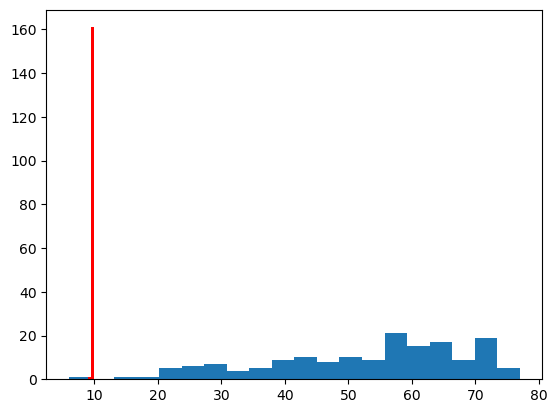

In [173]:
weather_data_with_events.max_humidity.corr(weather_data_with_events.min_visibility)
weather_data_with_events.max_dew.corr(weather_data_with_events.min_visibility)
plt.hist(weather_data_with_events.max_dew,bins = 20)
plt.hist(weather_data_with_events.max_visibility,bins = 2, color = "red")
plt.show()

In [174]:
weather_data_with_events.groupby("events").max_temp.max()

events
Fog                            96
Fog-Rain                       82
Fog-Rain-Snow                  57
Fog-Rain-Snow-Thunderstorm     57
Fog-Rain-Thunderstorm          89
Fog-Snow                       36
Fog-Thunderstorm               78
Rain                           94
Rain-Snow                      68
Rain-Thunderstorm             106
Snow                           40
Thunderstorm                  101
Name: max_temp, dtype: int64

In [175]:
weather_data_with_events.groupby("events").min_temp.min()

events
Fog                            4
Fog-Rain                      30
Fog-Rain-Snow                 15
Fog-Rain-Snow-Thunderstorm    28
Fog-Rain-Thunderstorm         44
Fog-Snow                      10
Fog-Thunderstorm              46
Rain                          19
Rain-Snow                     23
Rain-Thunderstorm             40
Snow                           5
Thunderstorm                  51
Name: min_temp, dtype: int64